In [2]:
!jt -t gruvboxd

Natural Language Processing (or NLP) is applying Machine Learning models to text and language. Teaching machines to understand what is said in spoken and written word is the focus of Natural Language Processing. Whenever you dictate something into your iPhone / Android device that is then converted to text, that’s an NLP algorithm in action.

Liek Image Classification but with text, for eg. like image dog or cat, the given restaurant review positive or -ve. This could be further developed into conversions like well visit there again or something vile and so on 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./Restaurant_Reviews.tsv', delimiter = '\t', quoting=3)

print(len(dataset))

1000


### Text Cleaning

In [3]:
import re #Regular Expression
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    
    ## STEMING - CONVERTING DIFFERENT FORMS TO NOUN, TRAVELED - travel, LIKING - like 
    ## Same Meaning Less Space
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    
    corpus.append(review)
    

In [4]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

### Creating the Bag of Worlds Model
While feeding text data to a algorithm, the data needs to be in a specific format for it to recognize it and work on it, Like Clustering or CNN we first create a model here and then split the data followed by training the model 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [6]:

len(X[0])

1500

Splitting Dataset


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Accuracy -  0.72


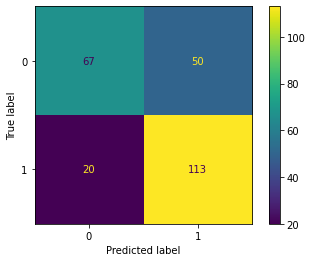

In [9]:
model = classifier.predict(X_test)
# print(np.concatenate((model.reshape(len(model), 1), y_test.reshape(len(y_test),1)), 1))

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
print('Accuracy - ', accuracy_score(y_test, model))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, model))
disp.plot()


In [39]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
